In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch
from pmdarima.arima import auto_arima
import re

plt.style.use("ggplot")

In [42]:
data = pd.read_csv("DataAssignment3.csv")

government = data.Government
data["NumberWordsTrans"] = np.log(data.NumberWords)
data.NumberWordsTrans += -2*np.roll(data.NumberWordsTrans, 1, axis=0) + np.roll(data.NumberWordsTrans, 2, axis=0)
# np.roll(data, 1, axis=0)
data = pd.get_dummies(data)
data    

,Date,NumberWords,NumberWordsTrans,Government_Conservative,Government_Independent,Government_Social Democrats,Government_Social Liberals,Government_Venstre
0,1919,156684,-5.312076,0,0,0,1,0
1,1920,170624,5.367485,0,0,0,0,1
2,1921,173917,-0.066115,0,0,0,0,1
3,1922,190745,0.073243,0,0,0,0,1
4,1923,192954,-0.080845,0,0,0,0,1
...,...,...,...,...,...,...,...,...
97,2016,26999144,0.058232,0,0,0,0,1
98,2017,27356201,-0.028163,0,0,0,0,1
99,2018,29523506,0.063105,0,0,0,0,1
100,2019,29931409,-0.062522,0,0,1,0,0


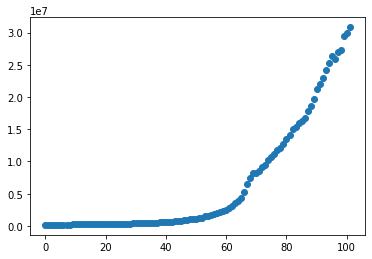

In [3]:
plt.scatter(range(len(data.NumberWords)), data.NumberWords)

## Fit ARIMA

In [148]:
# !pip install pmdarima 


reg_cols = [s for s in data.columns if re.match("Government", s) is not None]

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function 
model = auto_arima(np.log(data['NumberWords']), start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, max_d = 2,
                          d = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True, # set to stepwise
                          X = data[reg_cols]
                          )           
  
# To print the summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-341.364, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-325.041, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-332.575, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-329.812, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-243.019, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-339.509, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-338.558, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-330.212, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-335.837, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-337.861, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-340.061, Time=0.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.096 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 179.682
Date:                Wed, 13 Apr 2022   AIC                           -341.364
Time:                        18:04:38   BIC                           -317.828
Sample:                             0   HQIC                          -331.836
                                - 102                                         
Covariance Type:                  opg                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       0.0054      0.006      0.889      0.374      -0.007       0.017
Government_Conservative        -0.0034      0.051     -0.067      0.947      -0.103       0.097
Government_Independent         -0.0014      0.040     -0.035      0.972      -0.079       0.076
Government_Social Democrats     0.0183      0.016      1.129      0.259      -0.013       0.050
Government_Social Liberals     -0.0635      0.022     -2.841      0.005      -0.107      -0.020
Government_Venstre              0.0070      0.020      0.356      0.722      -0.031       0.045
ar.L1                           0.8897      0.110      8.083      0.000       0.674       1.105
ma.L1                          -0.7143      0.181     -3.951      0.000      -1.069      -0.360
sigma2                          0.0017      0.000     11.185      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               424.96
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             2.17
Prob(H) (two-sided):                  0.37   Kurtosis:                        12.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.6e+17. Standard errors may be unstable.
"""

In [220]:
pd.DataFrame({"p-value":model.pvalues(), "significant" : model.pvalues() < 0.05})

,p-value,significant
intercept,3.742074e-01,False
Government_Conservative,9.465773e-01,False
Government_Independent,9.721656e-01,False
Government_Social Democrats,2.587701e-01,False
Government_Social Liberals,4.501295e-03,True
Government_Venstre,7.216141e-01,False
ar.L1,6.294146e-16,True
ma.L1,7.791640e-05,True
sigma2,4.853791e-29,True


## Plot predictions

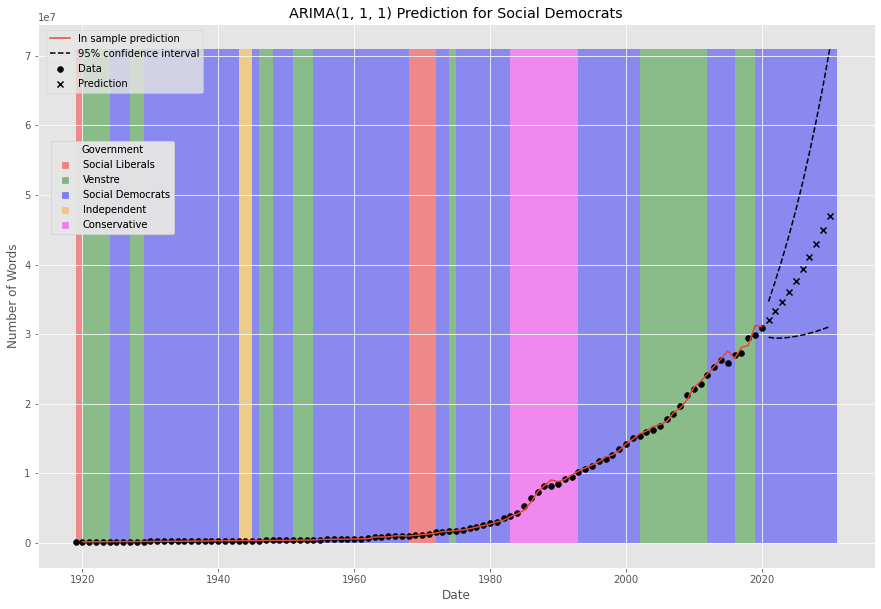

In [191]:
n_steps = 10
future_gov = "Social Democrats"



reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
reg_pred["Government_"+future_gov] = 1
preds, pred_int = model.predict(n_periods=n_steps, X = reg_pred, return_conf_int=True, alpha=0.05)
preds = np.exp(preds)
pred_int = np.exp(pred_int)

dates = np.arange(len(data.NumberWords)) + data.Date.min()

# plot 
fig, ax = plt.subplots(figsize = (15,10))

# set color rectangles to show government
col = ["red", "green", "blue", "orange", "magenta"]
gov_color = {gov : col[i] for i, gov in enumerate(government.unique())}
h = max(data.NumberWords.max(), preds.max(), pred_int.max())

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i],0), 1, h, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

for i in range(len(preds)):
    ax.add_patch(Rectangle((dates[-1]+i+1,0), 1, h, alpha=0.4, color = gov_color[future_gov], lw = 0, zorder = 0))

ax.scatter(dates, data.NumberWords, label = "Data", zorder = 1, color = "black")
ax.plot(dates[1:], np.exp(model.predict_in_sample(data[reg_cols][1:], start = 1)), label = "In sample prediction", zorder = 2)
ax.scatter(dates[-1]+np.arange(1, n_steps+1), preds, label = "Prediction", zorder = 1, color = "black", marker = "x")
ax.plot(dates[-1]+np.arange(1, n_steps+1), pred_int[:, 0], label = "95% confidence interval", color = "black", linestyle = "--")
ax.plot(dates[-1]+np.arange(1, n_steps+1), pred_int[:, 1], color = "black", linestyle = "--")
# ax.vlines(dates[-1]+.5, 0, h, color = "black", linestyles = "dashed")
ax.set_ylabel("Number of Words")
ax.set_xlabel("Date")
ax.set_title(f"ARIMA{model.get_params().get('order')} Prediction for {future_gov}")
# ax.legend()
ax.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)
ax.add_artist(ax.get_legend())
# ax.scatter(0,0, label ="test")
# ax.legend()
ax.add_artist(plt.legend(handles = [plt.scatter(x = None, y = None, alpha =.4, label=gov, color = gov_color[gov], marker="s") for gov in gov_color.keys()],
            loc = "center left", title = "Government", bbox_to_anchor = (0.01, 0.7)))



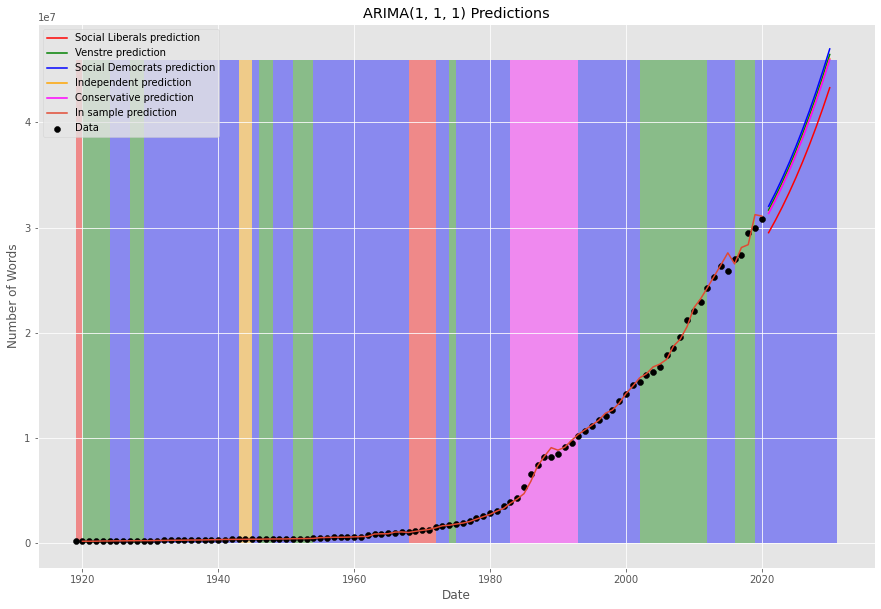

In [205]:
n_steps = 10

# plot 
fig, ax = plt.subplots(figsize = (15,10))

dates = np.arange(len(data.NumberWords)) + data.Date.min()

for gov in gov_color.keys():
    reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
    reg_pred["Government_"+gov] = 1
    preds= model.predict(n_periods=n_steps, X = reg_pred)
    preds = np.exp(preds)
    ax.plot(dates[-1]+np.arange(1, n_steps+1), preds, label = gov + " prediction", zorder = 1, color = gov_color[gov])





# set color rectangles to show government
col = ["red", "green", "blue", "orange", "magenta"]
gov_color = {gov : col[i] for i, gov in enumerate(government.unique())}
h = max(data.NumberWords.max(), preds.max())

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i],0), 1, h, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

for i in range(len(preds)):
    ax.add_patch(Rectangle((dates[-1]+i+1,0), 1, h, alpha=0.4, color = gov_color[future_gov], lw = 0, zorder = 0))

ax.scatter(dates, data.NumberWords, label = "Data", zorder = 1, color = "black")
ax.plot(dates[1:], np.exp(model.predict_in_sample(data[reg_cols][1:], start = 1)), label = "In sample prediction", zorder = 2)

ax.set_ylabel("Number of Words")
ax.set_xlabel("Date")
ax.set_title(f"ARIMA{model.get_params().get('order')} Predictions")
ax.legend()

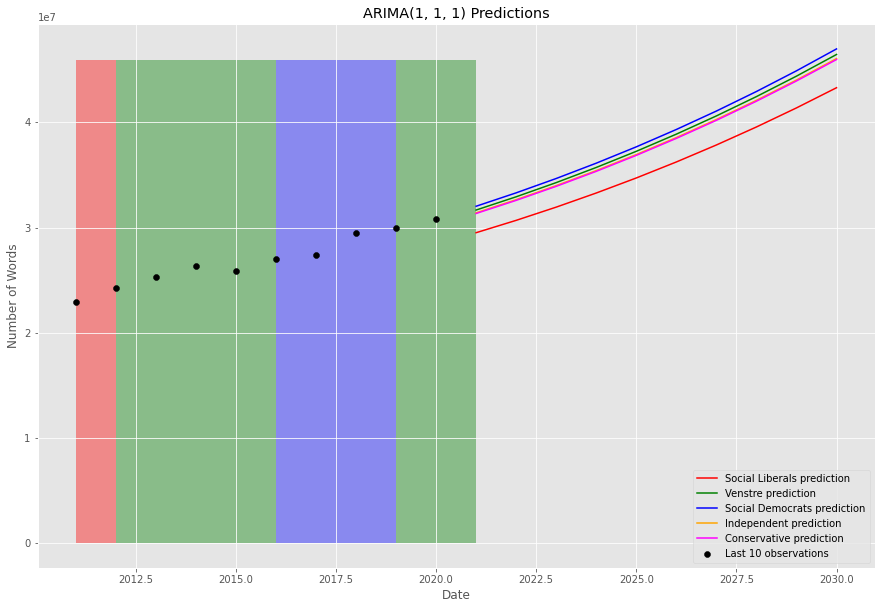

In [206]:
n_steps = 10
prev_steps = 10

# plot 
fig, ax = plt.subplots(figsize = (15,10))

dates = np.arange(len(data.NumberWords)) + data.Date.min()
dates = dates[-prev_steps:]

for gov in gov_color.keys():
    reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
    reg_pred["Government_"+gov] = 1
    preds= model.predict(n_periods=n_steps, X = reg_pred)
    preds = np.exp(preds)
    ax.plot(dates[-1]+np.arange(1, n_steps+1), preds, label = gov + " prediction", zorder = 1, color = gov_color[gov])


# set color rectangles to show government
col = ["red", "green", "blue", "orange", "magenta"]
gov_color = {gov : col[i] for i, gov in enumerate(government.unique())}
h = max(data.NumberWords[-prev_steps:].max(), preds.max())

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i],0), 1, h, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

ax.scatter(dates, data.NumberWords[-prev_steps:], label = f"Last {prev_steps} observations", zorder = 1, color = "black")

ax.set_ylabel("Number of Words")
ax.set_xlabel("Date")
ax.set_title(f"ARIMA{model.get_params().get('order')} Predictions")
ax.legend()

## Plot residuals

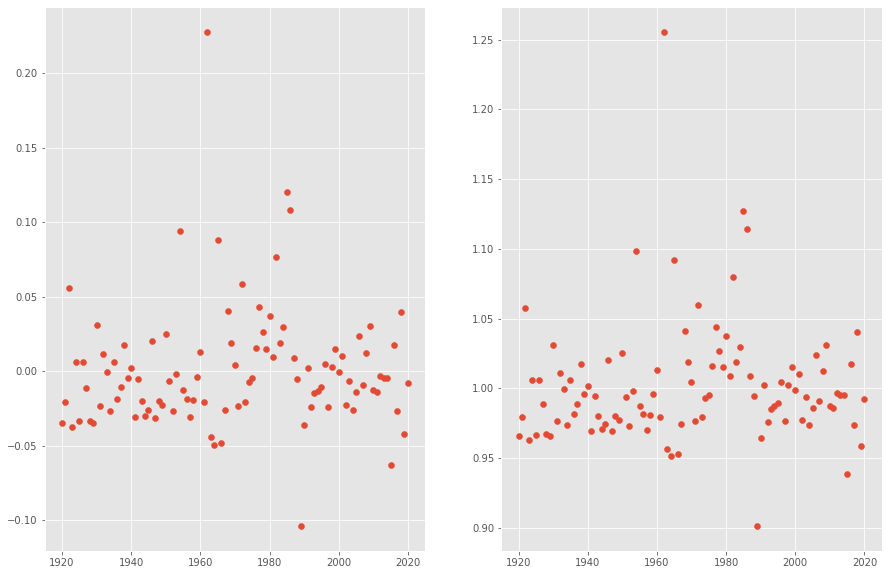

In [214]:
dates = np.arange(len(data.NumberWords)) + data.Date.min()

fig, ax = plt.subplots(1,2,figsize = (15,10))
ax[0].scatter(dates[1:], model.resid()[1:])
ax[1].scatter(dates[1:], np.exp(model.resid())[1:])

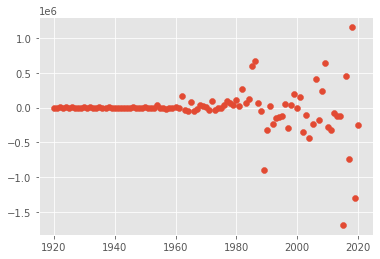

In [213]:
resids = data.NumberWords[1:] - np.exp(model.predict_in_sample(data[reg_cols][1:], start = 1))
plt.scatter(dates[1:], resids)